<a href="https://colab.research.google.com/github/snorre87/instructional_images/blob/master/TINFOIL_EMF_scientometri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook to describe workflow using Part of Speech tagging and Subject Verb Object dependency parsing to explore corpus.
Data is scientific articles around the field and controversy of health effects of Electromagnetic Frequencies and Radiation gathered from scopus (dataset is only for illustrative purposes),


In [ ]:
# Setup spacy
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm
import spacy
nlp_spacy = spacy.load("en_core_web_sm")

In [84]:
# Spacy parse example
doc = nlp_spacy('I like coffee and you love tea. He looks different you look like me')
spacy.displacy.render(doc.sents,jupyter=True)

In [85]:
import pandas as pd
path = '/content/drive/MyDrive/emf_citations/'
df = pd.read_pickle(path+'emf_df.pkl')
# remove empty abstracts
df = df[df.abstract.fillna('')!='']
df.shape



(7806, 31)

In [86]:
#df[['title','pubmed_id','abstract','author', 'year', 'journal', 'doi', 'keywords', 'author_keywords']].to_pickle(path+'emf_df_nocites.pkl')
df = pd.read_pickle('https://github.com/snorre87/instructional_images/blob/master/emf_df_nocites.pkl?raw=true')

## Initial Exploration

Word2Vec to get synonyms.

Wordtree to investigate contexts.

In [87]:
## Estimate word2vec to get evidence synonyms
! pip install gensim -U
! curl https://raw.githubusercontent.com/snorre87/wordviz/main/run_w2vec.py > run_w2vec.py
#! head -100 wordviz.py
from importlib import reload  
import run_w2vec as W2V
W2V = reload(W2V)



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2084  100  2084    0     0  13986      0 --:--:-- --:--:-- --:--:-- 14081
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
w2v = W2V.run_w2vec(df.abstract.fillna(''))

In [93]:
w2v.wv.most_similar('evidence',topn=15)

[('scientific_evidence', 0.7180134654045105),
 ('explanation', 0.6657065749168396),
 ('hypothesis', 0.6442242860794067),
 ('lack', 0.6392982006072998),
 ('exists', 0.6381337642669678),
 ('causal', 0.6339651942253113),
 ('findings', 0.6283441781997681),
 ('strong_evidence', 0.6187083721160889),
 ('knowledge', 0.6118740439414978),
 ('rationale', 0.5942691564559937),
 ('there_is', 0.5901082754135132),
 ('clear', 0.58387291431427),
 ('discussion', 0.5835087895393372),
 ('insufficient', 0.5827247500419617),
 ('support', 0.5791362524032593)]

In [94]:
OI = set(['evidence','findings','investigations','finding','support'])

In [95]:
w2v.wv.most_similar('suggest',topn=20)

[('indicate', 0.8956331610679626),
 ('show', 0.825411856174469),
 ('support_the_hypothesis', 0.7491461634635925),
 ('have_shown', 0.7416061758995056),
 ('reveal', 0.7347393035888672),
 ('provide_evidence', 0.7109951376914978),
 ('demonstrate', 0.6902895569801331),
 ('imply', 0.6831617951393127),
 ('suggests', 0.6831183433532715),
 ('confirm', 0.6789075136184692),
 ('highlight', 0.6757685542106628),
 ('indicated', 0.6659108996391296),
 ('indicates', 0.6645247936248779),
 ('confirms', 0.6563847064971924),
 ('conclude', 0.6551912426948547),
 ('give', 0.6534833908081055),
 ('indicate_that', 0.6386007070541382),
 ('suggest_that', 0.6301445364952087),
 ('showing', 0.6247208714485168),
 ('provide', 0.6241267919540405)]

In [96]:
VERB_OI = set(['suggest','show','reveal','demonstrate','confirm','suggests','indicates','support'])

In [92]:
## Investigate context
import nltk
nltk.download('punkt')
docs = [nltk.word_tokenize(doc) for doc in df.abstract.fillna('')]
! pip install wordcloud
! curl https://raw.githubusercontent.com/snorre87/wordviz/main/wordviz.py  > wordviz.py
#! head -100 wordviz.py
from importlib import reload  
import wordviz
wordviz = reload(wordviz)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7748  100  7748    0     0  56970      0 --:--:-- --:--:-- --:--:-- 56970
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
## Cooccurence of support.
import random
wt = wordviz.Wordtree(random.sample(docs,500))
wt.interact_wordtree()

interactive(children=(Text(value='we', description='word'), IntSlider(value=5, description='before', max=30), …

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

## POS tagging and Dependency Parsing

In [89]:
%time df['doc'] = df.abstract.apply(nlp_spacy)

CPU times: user 5min 31s, sys: 3.53 s, total: 5min 34s
Wall time: 5min 34s


In [ ]:
pd.read_html('https://ozzmaker.com/add-colour-to-text-in-python/')[0]

,Text color,Code,Text style,Code.1,Background color,Code.2
0,Black,30,No effect,0.0,Black,40
1,Red,31,Bold,1.0,Red,41
2,Green,32,Underline,2.0,Green,42
3,Yellow,33,Negative1,3.0,Yellow,43
4,Blue,34,Negative2,5.0,Blue,44
5,Purple,35,NaN,NaN,Purple,45
6,Cyan,36,NaN,NaN,Cyan,46
7,White,37,NaN,NaN,White,47


In [ ]:
## Color Part of Speech.
import pandas as pd
from collections import Counter
pcolors = dict(pd.read_html('https://ozzmaker.com/add-colour-to-text-in-python/')[0][['Text color','Code']].values)
pback = dict(pd.read_html('https://ozzmaker.com/add-colour-to-text-in-python/')[0][['Text color','Code.2']].values)
colors = list(pcolors)
import random
sent = random.choice(list(df.doc.sample(1).values[0].sents))
poss = Counter()
for doc in df.doc:
  for i in doc:
    poss[i.pos_]+=1

pos2col = {pos:colors[num] for num,(pos,_) in enumerate(poss.most_common(len(colors)))}
c = [i for i,_ in poss.most_common(len(colors)*2) if i not in pos2col]
pos2col2 = {}
for num,i in enumerate(c):
  pos2col2[i] = colors[num]

def print_color(sent,cut=True):
  bits = []
  for w,pos in sent:
    if pos not in set(pos2col)|set(pos2col2):
      s = s = '\033[1;30;47m %s'%(w)
    elif pos in pos2col:
      if pos2col[pos]=='White':
        s = '\033[1;30;%dm %s'%(pback[pos2col[pos]],w)
      else:

        s = '\033[1;37;%dm %s'%(pback[pos2col[pos]],w)
    else:
      if pos2col2[pos]=='White':
        s = '\033[0;30;%dm %s'%(pback[pos2col2[pos]],w)
      else:

        s = '\033[0;37;%dm %s'%(pback[pos2col2[pos]],w)
      
    bits.append(s)
  if cut:
    new = []
    count = 0 
    for i in bits:
      count+=len(i)
      new.append(i)
      if count>100:
        count = 0
        new.append('\n')
      
    s = ' '.join(new)
  else:
    s = ' '.join(bits)
  print(''.join(s))
def print_pos(sent,add_colorbar=True):
  new_sent = []
  poss_ = set()
  for w in sent:
    pos = w.pos_
    poss_.add(pos)
    w = w.text
    new_sent.append((w,pos))
  if add_colorbar:
    color_sent = [(pos,pos) for pos,c in poss.most_common() if pos in poss_]
    print_color(color_sent,cut=False)
    print()
  print_color(new_sent)  
print_pos(sent)

 NOUN  PUNCT  ADP  ADJ  VERB  DET  CCONJ  AUX  PRON

 Our  future  research  will  focus  on  microtubule 
  structure  throughout  the  cell  cycle  and  RF 
  radiation  effects  on  mitotic  spindle  .


In [ ]:
sent = random.choice(list(df.doc.sample(1).values[0].sents))
print_pos(sent)

 NOUN  PUNCT  ADP  ADJ  VERB  DET  AUX  ADV  SCONJ

 Results  :  The  results  indicate  that  using 
  a  cell  phone  for  ≥10  years  approximately 
  doubles  the  risk  of  being  diagnosed  with 
  a  brain  tumor  on  the  same  (  " 
  ipsilateral  "  )  side  of  the  head 
  as  that  preferred  for  cell  phone  use 
  .


## Visualize Nouns and Proper Nouns (names)

In [132]:
doc = df.doc.sample(1).values[0]

In [133]:
print(list(doc.sents)[0])

Background: We conducted a large registry-based study in California to investigate the association between race/ethnicity and childhood leukaemia focusing on two subtypes: acute lymphoblastic leukaemia (ALL) and acute myeloid leukaemia (AML).


In [146]:
## Example of parsing out Subject Verb Object.
import networkx as nx
g = nx.DiGraph()

for w in doc:
  if w.tag_ == 'nsubj' or w.tag_=='dobj':
     g.add_edge(w.head,w,**{'type':w.tag_})
  if w.pos_=='VERB':
    if w.dep_=='ROOT':
      
      children = list(w.children)
      keep = [(i,i.dep_) for i in children if i.dep_ in set(['nsubj','dobj'])]
      print(w,keep)
      print()
      



  

conducted [(We, 'nsubj'), (study, 'dobj')]

obtained [(We, 'nsubj'), (information, 'dobj')]

evaluated [(We, 'nsubj'), (risk, 'dobj')]

had [(children, 'nsubj'), (risk, 'dobj')]

associated []

associated []

observed []

observed []

observed []

confirm [(results, 'nsubj')]

indicate [(differences, 'nsubj')]



In [ ]:
## Counting word types from different tag sets.
from collections import Counter

types = ['dep_','pos_','tag_']
postype2common = {}
for pos_typ in types:
  pos_counts = Counter()
  for doc in df.doc.values:
    for i in doc:
      pos = getattr(i,pos_typ)
      pos_counts[pos]+=1
  typ2common = {typ:Counter() for typ,c in pos_counts.items()}
  for doc in df[df.abstract.apply(lambda x: 'cancer' in x.lower())].doc:
    for w in doc:
      pos = getattr(w,pos_typ)
      typ2common[pos][w.text.lower()] +=1
  postype2common[pos_typ] = typ2common


In [ ]:
typ2common = postype2common['pos_']

In [ ]:
# locating words with many different tags.
w2count = Counter()
for doc in df.doc:
  for w in doc:
    w2count[w.text.lower()]+=1
overlaps = []
for key in typ2common:
  for key2 in typ2common:
    overlap = set(typ2common[key]) &set(typ2common[key2])
    overlaps+=sorted(overlap,key=lambda x: typ2common[key][x]+typ2common[key2][x],reverse=True)[0:10]
import random
sorted(set(overlaps),key=lambda x: w2count[x],reverse=True)[40:60]

In [ ]:
# Showing different tags of the word "is"
word = 'is'
w2ex = {}
for doc in df.doc:
  
  for sent in doc.sents:
    sent_t = [i.text.lower() for i in sent]
    sent_t_up = [i.text for i in sent]
    for w in sent:
      if w.text.lower() ==word:
        pos = w.pos_
        if not pos in w2ex:
          w2ex[pos] = []
        idx = sent_t.index(word)
        sub = sent_t_up[max(0,idx-5):min(len(sent_t),idx+5)]
        w2ex[pos].append(sub)


In [ ]:
for pos in ['AUX','VERB','PROPN']:
  l = random.choice(w2ex[pos])
  l = ['\033[1;37;41m %s'%i if i.lower()!= word else '\033[1;37;40m %s'%i for i in l]
  print('\033[1;37;40m %s'%pos,' '.join(l))

 AUX  pulmonary  nodules  and  lung  cancer  is  rising  .
 VERB  in  agriculture  ,  but  there  is  still  much  work  to
 PROPN  EMF  )  ,  Infrasound  (  IS  )  and  hydrogen  peroxide


In [ ]:
# Pringint common types.
typ2common = postype2common['pos_'] # Universal Part of Speech Tag
for typ in sorted(typ2common,key=lambda x: sum(typ2common[x].values()),reverse=True):
  #print(typ,typ2common[typ].most_common(10))
  s = [(typ,typ)]+[(i,typ) for i,_ in typ2common[typ].most_common(10)]
  print_color(s)

 NOUN  cancer  %  exposure  risk  breast  study 
  studies  results  fields  cells
 PUNCT  ,  .  )  (  -  :  ;  " 
  [  ]
 ADP  of  in  for  to  with  on  by 
  from  as  between
 ADJ  magnetic  ©  other  occupational  -  significant 
  electromagnetic  high  low  human
 VERB  increased  using  associated  used  based 
  observed  found  be  compared  exposed
 DET  the  a  this  an  that  these  all 
  no  which  some
 PROPN  emf  ci  elf  cancer  inc.  mf 
  wiley  mwa  rf  emfs
 NUM  95  two  1  one  2  10  three 
  3  5  50
 CCONJ  and  or  but  &  both  either 
  n  and/or  nor  +
 AUX  was  were  is  are  be  have  been 
  may  has  can
 ADV  also  significantly  however  most  when 
  well  only  more  respectively  as
 PART  to  not  's  '  ’s  ’  nt 
  f  tn  μg
 PRON  we  there  it  our  who  their 
  its  they  them  i
 SCONJ  that  than  although  while  whether  because 
  if  since  near  whereas
 SYM  -  =  /  <  >  $  +  x 
  →  :
 X  <  vitro  i.e.  1  2  >  3 
  c  b  

Text(0.5, 1.0, 'NOUN and PROPN')

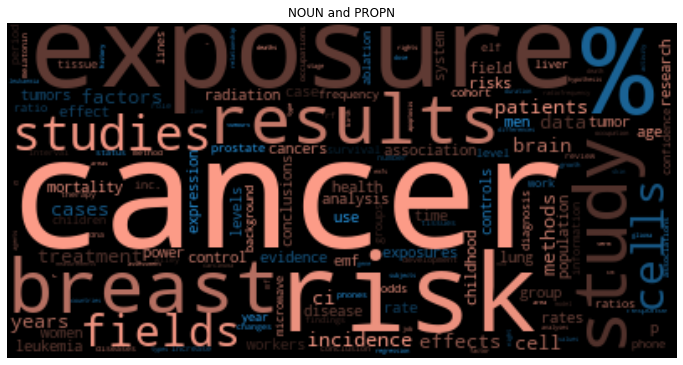

In [ ]:
## Viz Wordcloud
s = ['NOUN','PROPN']
wf = Counter()
clusters = {}
for num,i in enumerate(s):
  c = Counter(typ2common[i])
  wf.update(c)
  for w in c:
    clusters[w] = num

wc = wordviz.get_wordclod(wf)
fig = wordviz.color_by_groups(wc,clusters)
#wc
fig.set_size_inches(12,8)
plt.title('NOUN and PROPN')


Text(0.5, 1.0, 'VERBS')

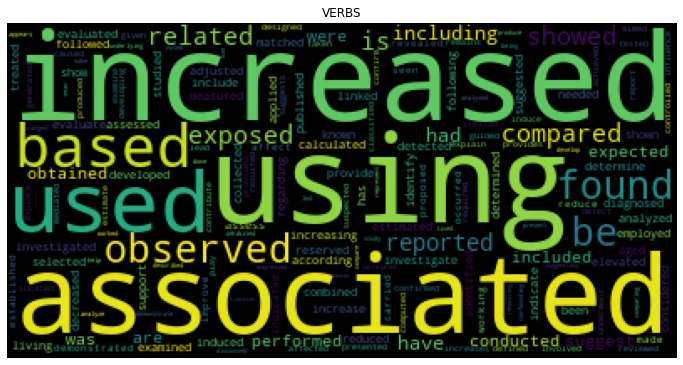

In [ ]:
## Viz Wordcloud

wf = typ2common['VERB'].copy()
# scale word freq
import numpy as np
wf = {w:np.log(count) for w,count in wf.items()}
wc = wordviz.get_wordclod(wf)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.imshow(wc)
plt.axis('off')
fig.set_size_inches(12,8)
plt.title('VERBS')


Text(0.5, 1.0, 'SCONJ CCONJ PART')

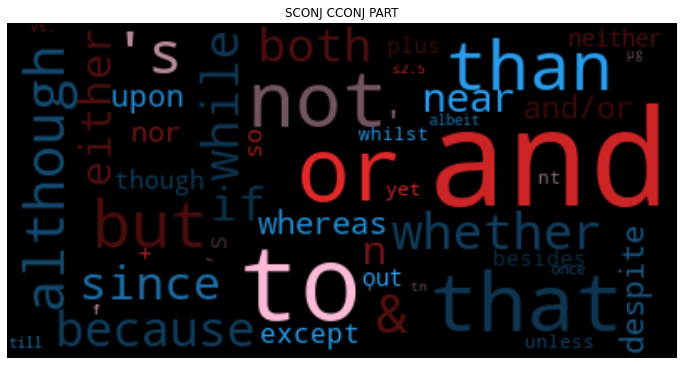

In [ ]:
## Viz Wordcloud
s = ['SCONJ', 'CCONJ', 'PART']
wf = Counter()
clusters = {}
for num,t in enumerate(s):
  c = typ2common[t].copy()
  wf.update(c)
  for w in c:
    clusters[w] = num
wf = {i:np.sqrt(c) for i,c in wf.items()}
wc = wordviz.get_wordclod(wf)
fig = wordviz.color_by_groups(wc,clusters)
#wc
fig.set_size_inches(12,8)
plt.title(' '.join(s))


## More elaborate part of speech tags

In [ ]:
typ2common = postype2common['tag_'] # Universal Part of Speech Tag
for typ in sorted(typ2common,key=lambda x: sum(typ2common[x].values()),reverse=True):
  s = [(typ,typ)][(i,typ) for i,_ typ2common[typ].most_common(10)]
  #print(typ,)

NN [('cancer', 3327), ('%', 1874), ('exposure', 1803), ('risk', 1664), ('breast', 1171), ('study', 1083), ('cell', 660), ('incidence', 587), ('brain', 517), ('treatment', 500)]
IN [('of', 11626), ('in', 6853), ('for', 3783), ('to', 3370), ('with', 3104), ('on', 1603), ('by', 1595), ('from', 1389), ('as', 1096), ('that', 1048)]
JJ [('magnetic', 617), ('©', 609), ('other', 500), ('occupational', 488), ('-', 444), ('significant', 423), ('electromagnetic', 418), ('high', 417), ('low', 383), ('human', 345)]
NNS [('studies', 979), ('results', 975), ('fields', 788), ('cells', 776), ('patients', 679), ('years', 586), ('cases', 584), ('data', 538), ('factors', 524), ('effects', 489)]
DT [('the', 13438), ('a', 4006), ('this', 1223), ('an', 1115), ('these', 669), ('all', 598), ('no', 531), ('some', 261), ('those', 242), ('both', 223)]
NNP [('emf', 435), ('ci', 273), ('elf', 237), ('cancer', 223), ('inc.', 211), ('mf', 172), ('wiley', 162), ('mwa', 143), ('rf', 123), ('emfs', 122)]
CD [('95', 762)

Text(0.5, 1.0, 'JJS JJR')

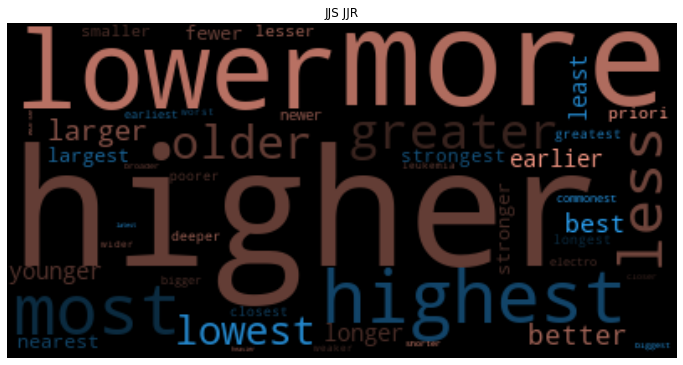

In [ ]:
## Viz Wordcloud
s = ['JJS','JJR']

#c = typ2common['JJS'].copy() # Adjective Superlative

clusters = {}
wf = Counter()
for num,i in enumerate(s):
  c =  typ2common[i]
  wf.update(c)
  for w in c:
    clusters[w] = num
wc = wordviz.get_wordclod(wf)

import matplotlib.pyplot as plt
fig = wordviz.color_by_groups(wc,clusters)
#wc
fig.set_size_inches(12,8)

plt.title(' '.join(s))


### Dependency parsing to extract what evidence/findings point to.

In [ ]:
## Loacte all sentences with 'evidence' or findings
evidence_sents = []
for doc in df[df.abstract.apply(lambda x: 'cancer' in x.lower())].doc:
  for sent in doc.sents:
    for w in sent:
      if w.text.lower() in OI:
        evidence_sents.append(sent)



In [ ]:
for sent in evidence_sents:
  break

In [ ]:
print_pos(sent)

 NOUN  PUNCT  ADP  ADJ  VERB  DET  PROPN  CCONJ  ADV

 The  types  of  gene  expression  affected  ( 
  e.g.  ,  genes  involved  in  cell  cycle 
  arrest  ,  apoptosis  and  stress  responses  , 
  heat  -  shock  proteins  )  are  consistent 
  with  the  findings  that  EMF  causes  genetic 
  damages  .


In [ ]:
## Inspect sentences to look for potentials in the dependency tree.
import random
from spacy import displacy
displacy.render([sent], style='dep', jupyter=True, options={'distance': 90})

In [ ]:
for w in sent:
  if w.text.lower() in OI:
    break


In [ ]:
import networkx as nx
data = []

def extract_subject_verb_object(doc,OI,NOUNS=set(['NOUN','PROPN'])):
  "Very greedy way of extracting subject verb object relations."
  dat = []
  for sent in doc.sents:
    parse_tree = nx.DiGraph()
    ois = []
    for w in sent:
      # check if object of interest
      if w.text.lower() in OI:
        ois.append(w)
      # build graph
      anc_t = set([i.text.lower() for i in w.ancestors])
      anc = w.ancestors
      for i in anc:
        parse_tree.add_edge(i,w)

    ## get object of interest connections.
    for i in ois:
      if parse_tree.has_node(i):
        ns = parse_tree[i]
        # check if verb
        for j in ns:

          if j.pos_=='VERB':
            # check if verb is connected to noun.
            for obj in parse_tree[j]:
              if obj.pos_ in NOUNS:
                d = {'OI':i.text.lower(),'verb':j.text.lower(),'obj':obj.text.lower()}            
                dat.append(d)
    return dat
for num,doc in enumerate(df.doc):
  dat = extract_subject_verb_object(doc,OI)
  for d in dat:
    d['doc_id'] = num
    data.append(d)


In [ ]:
evidence_df = pd.DataFrame(data)

(-0.5, 399.5, 199.5, -0.5)

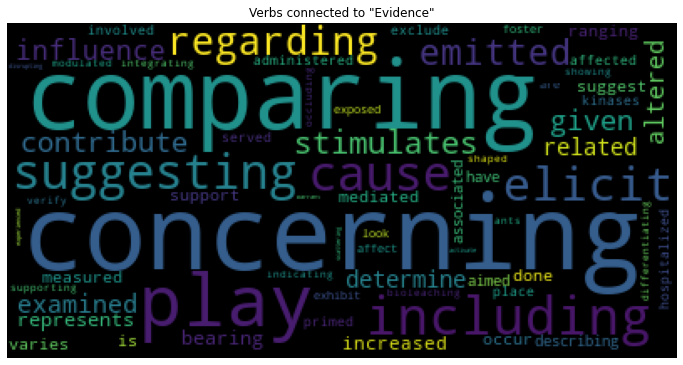

In [ ]:
## Visualize verbs connected to evidence
wc = wordviz.get_wordclod(Counter(evidence_df.verb.values))
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.title('Verbs connected to "Evidence"')
plt.axis('off')

## Using the SVO as summaries stimulating qualitative reading of specific documents.

In [ ]:
# getting summaries of articles
evidence_df[evidence_df.obj.apply(lambda x: 'mis' in x)]

,OI,verb,obj,doc_id
62,evidence,including,miscarriage,1819
84,evidence,emitted,transmission,2211
140,evidence,including,miscarriage,3085
162,evidence,emitted,transmission,3477
405,findings,examined,emissions,7189


In [ ]:
evidence_df[evidence_df.obj=='abnormalities']

,OI,verb,obj,doc_id
303,evidence,cause,abnormalities,5668
308,support,cause,abnormalities,5668


In [ ]:
# specific document of interest
df.iloc[5668].title

'Possible effects of electromagnetic fields on the nervous system and development'

In [ ]:
df.iloc[5668].abstract

"In spite of a large number of investigations, there is little evidence in support of the hypothesis that electromagnetic fields (EMFs) cause birth defects or genetic abnormalities. Exposure to magnetic fields has, however, been associated with development of brain tumors in both childhood residential and adult occupational studies. Risk ratios are low, but meta- analyses show a statistically significant relationship. Recent reports implicate EMF exposure in the incidence of Alzheimer's disease. While EMF exposure does not appear to be a major factor in neurodevelopmental diseases, further investigations are warranted on nervous system disorders such as brain tumors and Alzheimer's disease."

In [ ]:

evidence_df.sample(5)

,OI,verb,obj,doc_id
9,findings,concerning,suicide,451
403,findings,examined,phone,7189
411,findings,hospitalized,acute,7585
23,literature,including,displacement,1186
218,evidence,bearing,phone,4601


In [ ]:
df.iloc[7189][['title','abstract']].values

array(['Effects of mobile phone emissions on human brain activity and sleep variables',
       'Purpose: To compare the findings of the main studies that have examined the effects of GSM mobile phone radiofrequency emissions on human brain activity and sleep variables. Materials and methods: Fourteen published studies reporting on human brain electrical activity measurements during and/or after such radiofrequency emissions were identified and compared. Conclusions: Although, in general, outcomes have been inconsistent and comparison between individual studies is difficult, enhanced electroencephalogram alpha-band power has been noted in several of the studies, a phenomenon also observed in some animal studies. Performance decrements observed in some recent extremely low frequency studies are consistent with enhanced alpha-band power, highlighting the possible role of extremely low frequency fields associated with battery current in mobile phone handsets. However, more complex cognitiv

In [ ]:
evidence_df[evidence_df.doc_id==7189]

2021-05-25 11:50:41,288 : INFO : NumExpr defaulting to 2 threads.


,OI,verb,obj,doc_id
400,findings,examined,effects,7189
401,findings,examined,gsm,7189
402,findings,examined,mobile,7189
403,findings,examined,phone,7189
404,findings,examined,radiofrequency,7189
405,findings,examined,emissions,7189
406,findings,examined,brain,7189
407,findings,examined,activity,7189
408,findings,examined,sleep,7189
409,findings,examined,variables,7189


In [ ]:
# Setup textacy for Subject Verb Object Detection.
! pip install textacy
! pip install -U pip setuptools wheel
! pip install thinc --pre

import textacy
def extract_svo_textacy(doc):
  dat = []

  SVOs = textacy.extract.subject_verb_object_triples(doc)
  for s in SVOs:
    
    svo_lemma = [t[0].lemma_ for t in s]#lemmatize svo patterns
    dat.append(dict(list(zip(['subject','verb','object'],svo_lemma))))
  return dat
data = []
for num,doc in enumerate(df.doc):
  dat = extract_svo_textacy(doc)
  for d in dat:
    d['doc_id'] = num
    data.append(d)
svo = pd.DataFrame(data)


In [ ]:
svo[svo.subject.isin(OI)]

,subject,verb,object,doc_id
8,evidence,highlight,importance,1
93,finding,support,exposure,18
280,finding,contribute,potential,52
281,finding,corroborate,potential,52
339,literature,result,criterion,63
...,...,...,...,...
39718,finding,merit,investigation,7710
40034,finding,provide,support,7768
40040,literature,be,-,7770
40162,finding,confirm,sensitivity,7794


In [ ]:
svo[svo.verb.isin(VERB_OI)]

,subject,verb,object,doc_id
3,result,suggest,to,0
14,creation,reveal,outcome,2
22,result,show,leaching,5
58,intake,show,effect,11
61,dependence,show,efficiency,12
...,...,...,...,...
40139,they,show,effect,7790
40162,finding,confirm,sensitivity,7794
40165,investigation,demonstrate,effect,7795
40196,we,suggest,research,7802


In [ ]:
pprint(df.iloc[18].abstract)

('This research investigated the spatial association between '
 'socioenvironmental factors and gastroschisis in Brazilian triple side '
 'border. A geographic analysis for gastroschisis prevalence was performed '
 'considering census sector units using Global Moran Index, Local Indicator of '
 'Spatial Association Analysis and Getis Ord statistics. Sociodemographic '
 'factors included rate of adolescent and parturients over 35 years; '
 'population with no income and above 5 minimum wages; rate of late prenatal; '
 'and proximity to power transmission lines. Logistic regression models were '
 'applied to verify the association between socio-environmental factors and '
 'prevalence of gastroschisis. No global spatial correlation was observed in '
 'the distribution of gastroschisis (Moran´s I = 0.006; p = 0.319). However, '
 'multiple logistic regression showed census sectors with positive cases had '
 'higher probability to power transmission lines proximity (OR 3,47; CI 95% '
 '1,11

In [ ]:
svo[svo.doc_id==7189]

2021-05-25 15:21:31,077 : INFO : NumExpr defaulting to 2 threads.


,subject,verb,object,doc_id
37152,that,have,effect,7189
37153,task,appear,to,7189
37154,effect,have,use,7189
37155,radiofrequency,have,to,7189


In [ ]:
svo[svo.subject=='phone']

,subject,verb,object,doc_id
882,phone,expose,woman,152
886,phone,could,potential,152
2696,phone,have,to,474
4020,phone,emit,radiation,710
4595,phone,be,result,817
...,...,...,...,...
36956,phone,might,effect,7141
37757,phone,do,to,7292
38457,phone,could,cancer,7443
38658,phone,do,to,7486


In [ ]:
from pprint import pprint
pprint(df.iloc[7443].abstract)

('There are several reports which indicate that electromagnetic radiation '
 '(such as from mobile phones) at non-thermal levels may elicit a biological '
 'effect in target cells or tissues. Whether or not these biological effects '
 'lead to adverse health effects, including cancer, is unclear. To date there '
 'is limited scientific evidence of health issues, and no mechanism by which '
 'mobile phone radiation could influence cancer development. In this paper, we '
 'develop a theoretical mechanism by which radiofrequency radiation from '
 'mobile phones could induce cancer, via the chronic activation of the heat '
 'shock response. Upregulation of heat shock proteins (Hsps) is a normal '
 'defence response to a cellular stress. However, chronic expression of Hsps '
 'is known to induce or promote oncogenesis, metastasis and/or resistance to '
 'anticancer drugs. We propose that repeated exposure to mobile phone '
 'radiation acts as a repetitive stress leading to continuous expres

In [ ]:
doc = df[df.abstract.apply(lambda x: x.lower().count('reports by the national academy of sciences and the national cancer')>0)].doc.values[0]
for sent in doc.sents:
  if len(set([i.text.lower() for i in sent])&OI):
    break
sentence_spans = [sent]
displacy.render(sentence_spans, style='dep', jupyter=True, options={'distance': 90})




## Make cooccurence network of Evidence Sentences.

In [ ]:
## Make evidence findings cooccur network
keep_types = set(['VERB','NOUN','PROPN'])
window = 3
import networkx as nx
g = nx.Graph()
for sent in evidence_sents:
  keep = []
  for w in sent:
    if w.pos_ in keep_types:
      keep.append(w)
  for i in range(len(keep)-1):
    wi = keep[i]
    n,pos = wi.lemma_.lower(),wi.pos_
    g.add_node(n,**{'type':pos})
    for j in range(i+1,min(i+window,len(keep))):
      wj = keep[j]
      n2,pos2 = wj.lemma_,wj.pos_
      g.add_node(n2,**{'type':pos2})
      if n==n2:
        continue
      if not g.has_edge(n,n2):
        g.add_edge(n,n2,weight=1)
        continue
      g[n][n2]['weight']+=1

In [ ]:
! pip install umap-learn

In [ ]:
import umap
reducer = umap.UMAP()
nodes = list(g)
X = nx.linalg.graphmatrix.adjacency_matrix(g,nodelist=nodes)
embedding = reducer.fit_transform(X)
pos = {n:tuple(embedding[num]) for num,n in enumerate(nodes)}

In [ ]:
core = nx.k_core(g,k=15)
len(core)

141

In [ ]:
! pip install adjustText

In [ ]:
import numpy as np
rand_emb = embedding + np.random.normal(0,1,embedding.shape)
pos = {n:tuple(rand_emb[num]) for num,n in enumerate(nodes)}

In [ ]:
pos = nx.layout.kamada_kawai_layout(g)

500

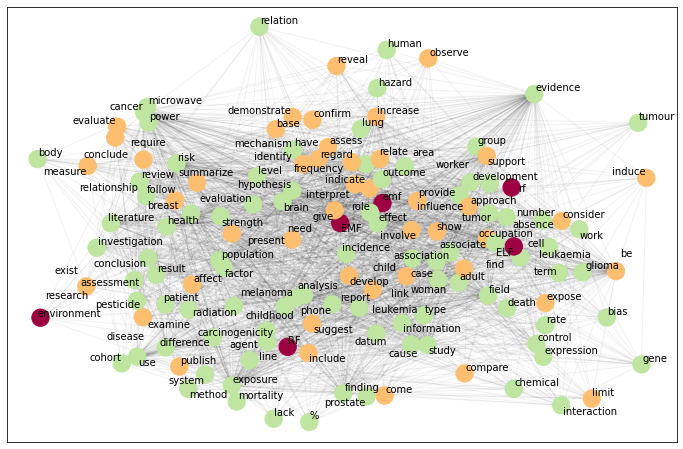

In [ ]:

from adjustText import adjust_text
import matplotlib.pyplot as plt
types = set(['NOUN','VERB','PROPN'])
typ2color = {typ:plt.cm.Spectral(num/len(types)) for num,typ in enumerate(types)}
color_map = []
fig = plt.figure(figsize=(12,8))
for i in core:
  typ = g.nodes[i]['type']
  color_map.append(typ2color[typ])
nx.draw_networkx_nodes(core,pos=pos,node_color=color_map)
nx.draw_networkx_edges(core,pos=pos,alpha=0.05)
texts = []
for i in core:
  texts.append(plt.text(pos[i][0],pos[i][1],i))
adjust_text(texts)


In [ ]:

sentence_spans = random.sample(evidence_sents,1)
displacy.render(sentence_spans, style='dep', jupyter=True, options={'distance': 90})


In [ ]:
# Possibly a more suited Parser.
! pip install scispacy
! pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz # download specific model

import scispacy
import spacy

nlp = spacy.load("en_core_sci_sm",)

In [149]:
doc = nlp("Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals.")

RuntimeError: ignored

In [ ]:
### BUMMER NOT WORKING OUT OF THE BOX